<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA2_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 2**

GRUPO 10

Elena Gómez

Ana Muñoz

## **Objetivo**

El  objetivo  de  esta  práctica  es  diseñar,  configurar  y  entrenar  un  modelo    Redes  de Neuronas Convolucionales. 

Crearemos un modelo  de Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, 
configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  

Usaremos el conjunto de datos Fashion-MNIST, precargado en Keras.
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución (28 x 28 píxeles)

Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 



In [19]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


- **Datos Fashion-MNIST**

A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')


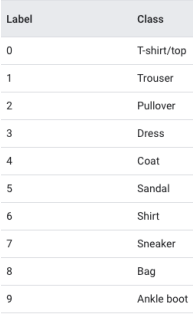

In [20]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

 **Estudio de datos:**

 Como vimos en la primera práctica, sabemos que las imágenes tienen la siguiente forma:

 (60000, 28, 28)

 Del mismo modo, sabemos las etiquetas son números enteros que corresponden con la prenda de la imagen ya clasificada.


In [81]:
print(train_labels[5000])

4


## **Creamos los modelos**

- Importamos todo lo necesario para nuestros modelos

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Vamos a crear 3 modelos diferentes de RNA,  los cuales van a ser definidos, configurados, entrenados, evaluados y mejorados para posteriormente usarlos para hacer predicciones.

Para todos los modelos la red sera secuencial y tendrá dos capas convolucionales y una o dos capas tipo Dense. Cambiaremos el optimizador, la función de activación y el tamaño de la ventana de las capas convolucinales mientras que el tamaño de la ventana de la capa pooling siempre será 2x2.


Cada una de las neuronas de la capa de entrada están conectadas con una matriz tamaño 28x28. Solo lo definimos para la primera capa, para la segunda capa y posteriores, Keras lo deduce.


Para los tres modelos la última capa tendrá función de activación softmax y 10 neuronas. Esto se debe a que nos interesa sacar una distribución de probabilidad sobre las clases de prendas que tenemos.

**MODELO 1**

In [22]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


Explicación Summary

En la primera capa convolucional obtenemos 832 parámettos que son el resultado de : ((5x5) + 1)x32, siendo 5 el tamaño de la ventana y 32 los filtros que aplicamos. 

Con esto realizamos el maxpooling con una ventana 2x2 obteniendo 32 matrices de 12x12 que serán los datos de entrada de la segunda capa.

In [23]:
model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


Explicación Summary

En la segunda capa convolucional obtenemos 51264 parámettos que son el resultado de : ((5x5x32) + 1)x64, siendo 64 los nuevos filtros que aplicamos a lo anterior. 

Con esto realizamos el maxpooling con una ventana 2x2 obteniendo 64 matrices de 4x14 que serán los datos de entrada de la última capa.

In [24]:
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

Explicación Summary

Antes de la última capa, añadimos una capa Flatten para ajustar los tensores a la entrada de la capa densa, es decir, aplanamos los datos pasando de un tensor 3D a uno 1D

La salida (4,4,64) se debe pasar a un vector (4x4x64) = 1024.

Con esto en la última capa tenemos 10250 parámetros que es el resultado de: 1024x10 + 10.

**Modelo 2**

In [25]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


- Explicación Summary

En la primera capa convolucional obtenemos 3200 parámettos que son el resultado de : ((7x7) + 1)x64, siendo 7 el tamaño de la ventana y 64 los filtros que aplicamos y el 1 el umbral. 

Obtenemos 64 matrices del mismo tamaño que las matrices de entrada al haberle añadido padding, es decir, no se reduce su tamaño inicial.

Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 64 matrices de 14x14 que serán los datos de entrada de la segunda capa.

In [26]:
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


- Explicación Summary

En la segunda capa convolucional obtenemos 73856 parámettos que son el resultado de : ((3x3)x64 + 1)x128, siendo 3 el tamaño de la ventana y 64 los filtros anteriores, 128 los filtros nuevos que aplicamos y el 1 el umbral. 

Obtenemos 128 matrices del mismo tamaño que las matrices de entrada al haberle añadido padding, es decir, 14x14.

Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 128 matrices de 7x7 que serán los datos de entrada de la siguiente capa.

In [27]:
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 65)               

- Explicación Summary

Antes de las últimas capas, añadimos una capa Flatten para ajustar los tensores a la entrada de las capas densas.

La salida (7,7,6128) se debe pasar a un vector (7x7x128) = 6272.

Con esto en la primera capa densa tenemos 407745 parámetros que es el resultado de: 6272x65 + 65. Donde 65 es el número de neuronas de la capa.

En la capa de salida obtenemos 660 parámetros que son el resultado de 10x65 + 10. Siendo 10 el número de neuronas de la última capa que corresponde con el número de clases que tenemos.

**Modelo 3**

In [28]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.summary()
#Explicacion summary:
# [(7*7)+1]*64 = 3200 ---> Matrices de 28x28 al añadir padding
#En el maxpooling obtenemos 64 matriz de 14x14.


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [29]:
model3.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()
#73856 = ((3*3*64)+1)*128 --> matrices de 14x14
#Con el Maxpooling obtenemos matrices de 7x7

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [30]:
model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()
#Flatten:
#Antes tenemos que ajustar los tensores a la entrada de la capa
#densa. Pasar de un tensor 3D a uno 1D (aplanar).
#Nuestra salida (7,7,128) se debe pasar a un vector de 
#(7x7x128=6272) antes de aplicar softmax)
#Primera capa densa:
#(65*6272)+65 = 407745
#Segunda capa densa(softmax):
#(10*65)+10 = 660

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 65)               

Como vemos, el tercer modelo es análogo al segundo, obtenemos los resultados. Lo único que cambia es el optimizador, que veremos más adelante.

## **Tansformación de datos**

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28, 28, 1) con valores entre 0 y 1

In [31]:
print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


## **Compilamos los modelos**


* Para el algoritmo optimizador utilizamos '**adam**' , o '**sgd**' (Stocastic Gradient Descendent), dependiendo del modelo.

* Para la función de perdida elegimos **sparse_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso y que la fase de entrenamiento intentará minimizar.

* Para la precisión utilizaremos **accuracy**: Solo tendremos en cuenta la fracción de imágenes que son correctamente clasificadas.

In [32]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [33]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [34]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## **Entrenamos y probamos los modelos**

Utilizamos la función `fit` que devuelve los valores de pérdida y de precisión de la red para las imágenes de entrenamiento.

In [36]:
model1.fit(train_images, train_labels, 
           batch_size=100,
           epochs=5)

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 1.1942 - accuracy: 0.6044
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.6631 - accuracy: 0.7579
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.5782 - accuracy: 0.7906
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.5286 - accuracy: 0.8098
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4943 - accuracy: 0.8278
Test accuracy: 0.8277999758720398


In [37]:
model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 1.0520 - accuracy: 0.6372
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.6380 - accuracy: 0.7656
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.5573 - accuracy: 0.7976
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.5069 - accuracy: 0.8167
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.4778 - accuracy: 0.8278
Test accuracy: 0.8277999758720398


In [38]:
model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.4639 - accuracy: 0.8314
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2977 - accuracy: 0.8928
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2550 - accuracy: 0.9066
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2269 - accuracy: 0.9172
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2471 - accuracy: 0.9120
Test accuracy: 0.9120000004768372


## **Apartado 3**

Analizar e interpretar los resultados del caso 1 frente a su original si se 
multiplica por 5 las épocas de entrenamiento (25)


In [39]:
model11 = Sequential()
model11.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model11.add(MaxPooling2D((2, 2)))

model11.add(Conv2D(64, (5, 5), activation='relu'))
model11.add(MaxPooling2D((2, 2)))

model11.add(Flatten())
model11.add(Dense(10, activation='softmax'))
model11.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [40]:
model11.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model11.fit(train_images, train_labels, epochs=25, batch_size=100)

test_loss11, test_acc11 = model11.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc11)

Epoch 1/25
600/600 [==============================] - 5s 8ms/step - loss: 1.2359 - accuracy: 0.5857
Epoch 2/25
600/600 [==============================] - 5s 8ms/step - loss: 0.6893 - accuracy: 0.7458
Epoch 3/25
600/600 [==============================] - 5s 8ms/step - loss: 0.5983 - accuracy: 0.7809
Epoch 4/25
600/600 [==============================] - 5s 8ms/step - loss: 0.5457 - accuracy: 0.8026
Epoch 5/25
600/600 [==============================] - 5s 8ms/step - loss: 0.5073 - accuracy: 0.8195
Epoch 6/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4802 - accuracy: 0.8291
Epoch 7/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4586 - accuracy: 0.8377
Epoch 8/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4430 - accuracy: 0.8437
Epoch 9/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4289 - accuracy: 0.8494
Epoch 10/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4168 - accuracy: 0.8549

## **Apartado 4**

Analizar el resultado del caso 1 si en lugar de ReLU usas tanh en la función de 
activación de las dos capas convolucionales.


In [62]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), activation='tanh'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 10)              

In [63]:
model12.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model12.fit(train_images, train_labels, epochs=5, batch_size=100)

test_loss12, test_acc12 = model12.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc12)

Epoch 1/5
600/600 [==============================] - 6s 8ms/step - loss: 1.0855 - accuracy: 0.6614
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.6556 - accuracy: 0.7590
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.5792 - accuracy: 0.7889
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5325 - accuracy: 0.8095
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5061 - accuracy: 0.8210
Test accuracy: 0.8209999799728394


## **Predicciones**

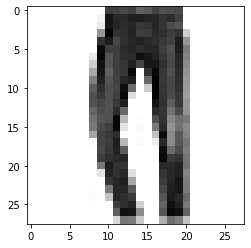

In [64]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [65]:

train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


Hacemos predicciones sobre la 6º imagen de test en cada modelo

 **Modelo 1**

In [66]:
import numpy as np
predictions1 = model1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[2.8058578e-04 9.9950957e-01 5.3422464e-06 1.4822996e-05 1.7255405e-04
 1.2055837e-07 1.5142855e-05 1.4000002e-09 1.8663929e-06 1.7999610e-10]
[[2.25963777e-06 5.59016122e-08 6.35586230e-06 ... 2.36625284e-01
  2.50583398e-03 6.78777039e-01]
 [4.17482806e-03 2.95181309e-07 9.24174309e-01 ... 2.80956503e-09
  2.13667212e-04 1.93425080e-08]
 [4.30606588e-06 9.99990582e-01 4.09997973e-08 ... 4.28021452e-10
  6.21977634e-08 1.51407220e-11]
 ...
 [3.07213310e-02 8.03703642e-07 1.36009778e-03 ... 1.72827495e-05
  9.21613574e-01 2.64089863e-06]
 [6.86885614e-04 9.79351163e-01 1.54549689e-05 ... 1.57279610e-05
  9.31569139e-06 3.10817381e-06]
 [2.99097912e-04 2.46925119e-05 1.19138800e-03 ... 2.96071798e-01
  1.60507262e-02 1.14850635e-02]]


**Modelo 2**

In [67]:
predictions2 = model2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[2.3395555e-04 9.9913138e-01 2.4991314e-05 6.6727065e-05 5.0234131e-04
 2.9614316e-08 4.0101299e-05 2.3060355e-08 5.1786560e-07 1.6633400e-08]
[[4.63515607e-05 2.82086319e-07 9.28730242e-06 ... 1.63629428e-01
  4.60750982e-03 7.81928062e-01]
 [3.65709653e-04 3.41110240e-06 9.65988874e-01 ... 2.94329450e-10
  5.99230589e-05 3.40215772e-10]
 [1.04102055e-05 9.99957085e-01 2.54239296e-07 ... 4.51398963e-09
  7.78033815e-09 1.57193425e-09]
 ...
 [1.45459892e-02 3.24911548e-06 4.83145035e-04 ... 7.78404283e-05
  9.13160145e-01 5.46404681e-06]
 [8.72317702e-04 9.50677276e-01 1.73354973e-04 ... 6.47355919e-05
  1.29396749e-05 3.20155305e-05]
 [5.21629700e-04 3.30130970e-05 7.67957536e-04 ... 7.99385756e-02
  2.15005204e-02 7.82761071e-03]]


**Modelo 3**

In [68]:

predictions3 = model3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[2.8742359e-06 9.9998665e-01 5.3383319e-06 1.4881464e-06 8.3287154e-07
 9.5644537e-10 1.3881386e-06 2.9746397e-10 1.4153565e-06 5.4950544e-10]
[[1.5406330e-07 7.3650440e-08 1.7527848e-08 ... 7.8029966e-04
  2.3711412e-07 9.9906701e-01]
 [1.9235427e-04 1.0163009e-09 9.9943143e-01 ... 4.9749233e-11
  8.6545704e-09 2.6080497e-11]
 [2.1026723e-08 9.9999952e-01 6.1746071e-08 ... 3.3092424e-12
  4.1407214e-10 1.9247934e-12]
 ...
 [4.0368337e-07 8.0397444e-10 2.1311067e-08 ... 8.4784489e-08
  9.9999833e-01 2.5649949e-10]
 [5.8645822e-09 9.9999964e-01 1.6373789e-08 ... 2.6983455e-12
  2.7778117e-11 7.4173160e-13]
 [6.0463357e-03 3.9914358e-04 6.9425148e-03 ... 3.5447869e-01
  9.4913095e-02 1.6585788e-03]]


Ahora vamos a graficar las predicciones de la imagen 6 en cada modelo

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

**Modelo 1**

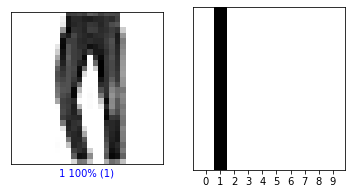

In [70]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

**Modelo 2**

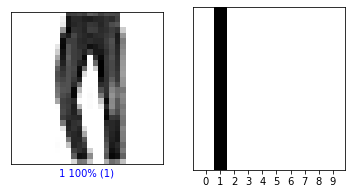

In [71]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  test_labels)
plt.show()

**Modelo 3**

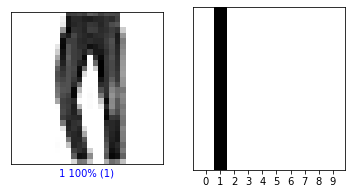

In [72]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions3[i],  test_labels)
plt.show()

Vemos la predicción, igual que el gráfico anterior, de las 14 primeras imágenes del conjunto de test, para cada uno de los casos.

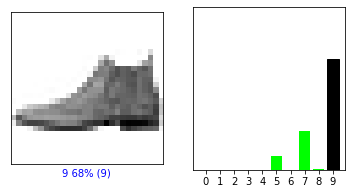

<Figure size 432x288 with 0 Axes>

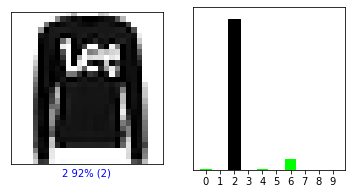

<Figure size 432x288 with 0 Axes>

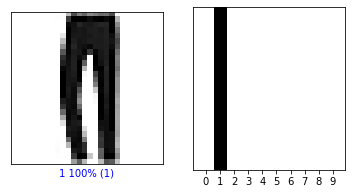

<Figure size 432x288 with 0 Axes>

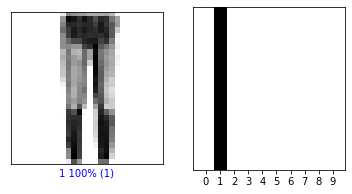

<Figure size 432x288 with 0 Axes>

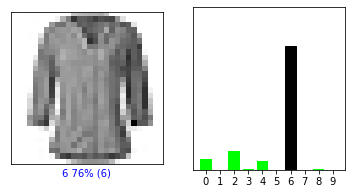

<Figure size 432x288 with 0 Axes>

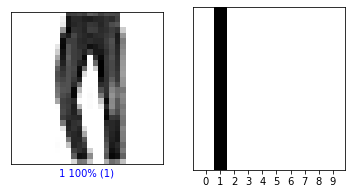

<Figure size 432x288 with 0 Axes>

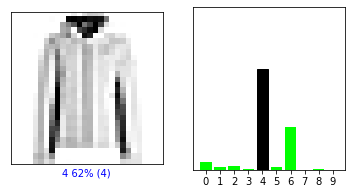

<Figure size 432x288 with 0 Axes>

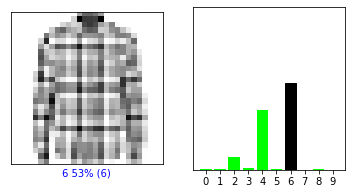

<Figure size 432x288 with 0 Axes>

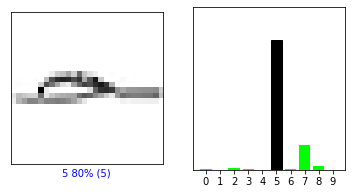

<Figure size 432x288 with 0 Axes>

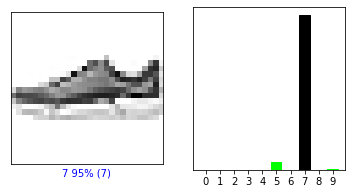

<Figure size 432x288 with 0 Axes>

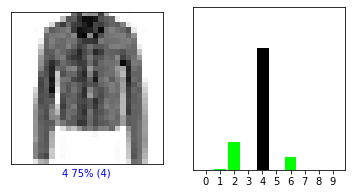

<Figure size 432x288 with 0 Axes>

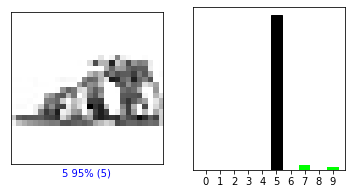

<Figure size 432x288 with 0 Axes>

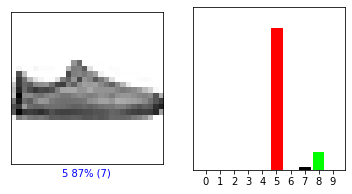

<Figure size 432x288 with 0 Axes>

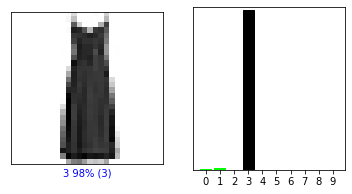

<Figure size 432x288 with 0 Axes>

In [73]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()

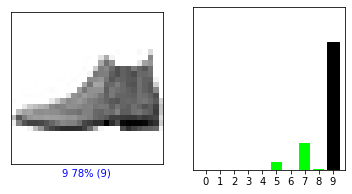

<Figure size 432x288 with 0 Axes>

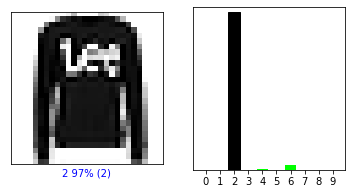

<Figure size 432x288 with 0 Axes>

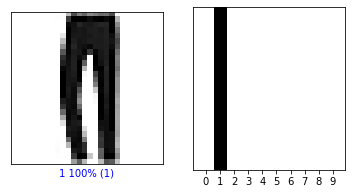

<Figure size 432x288 with 0 Axes>

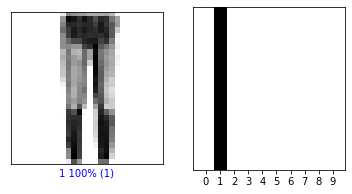

<Figure size 432x288 with 0 Axes>

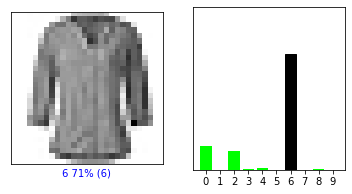

<Figure size 432x288 with 0 Axes>

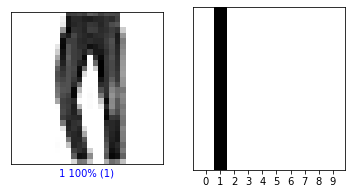

<Figure size 432x288 with 0 Axes>

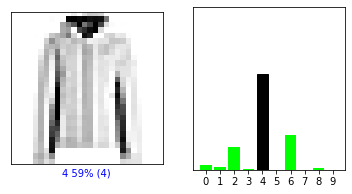

<Figure size 432x288 with 0 Axes>

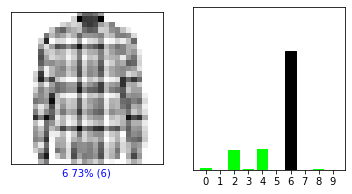

<Figure size 432x288 with 0 Axes>

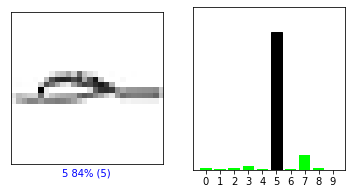

<Figure size 432x288 with 0 Axes>

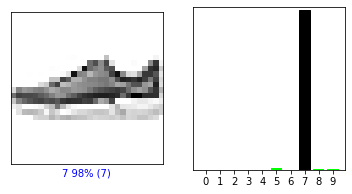

<Figure size 432x288 with 0 Axes>

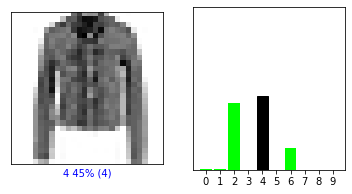

<Figure size 432x288 with 0 Axes>

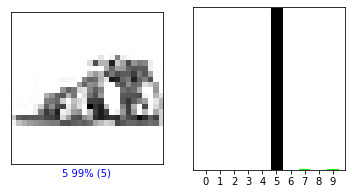

<Figure size 432x288 with 0 Axes>

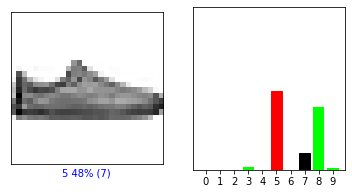

<Figure size 432x288 with 0 Axes>

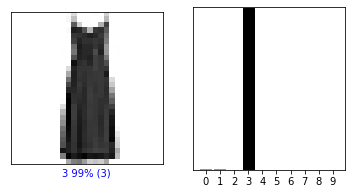

<Figure size 432x288 with 0 Axes>

In [74]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()
    plt.clf()

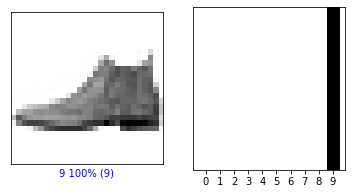

<Figure size 432x288 with 0 Axes>

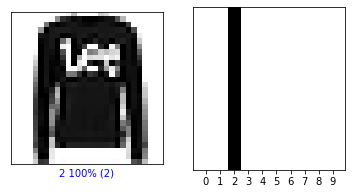

<Figure size 432x288 with 0 Axes>

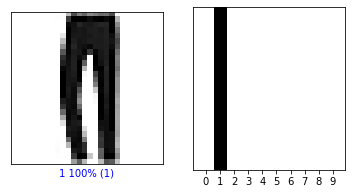

<Figure size 432x288 with 0 Axes>

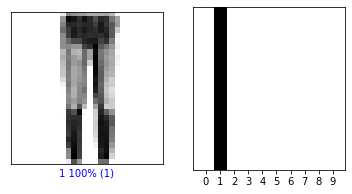

<Figure size 432x288 with 0 Axes>

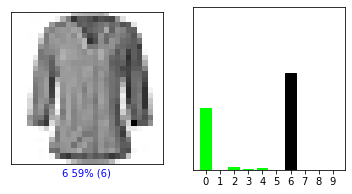

<Figure size 432x288 with 0 Axes>

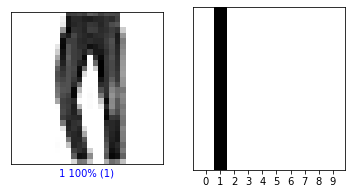

<Figure size 432x288 with 0 Axes>

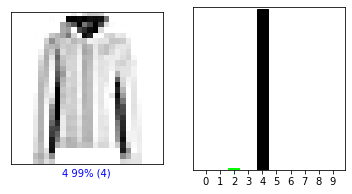

<Figure size 432x288 with 0 Axes>

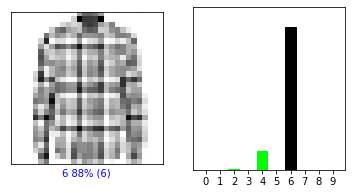

<Figure size 432x288 with 0 Axes>

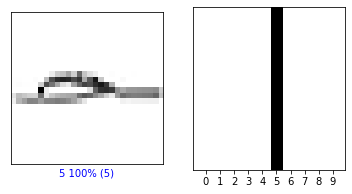

<Figure size 432x288 with 0 Axes>

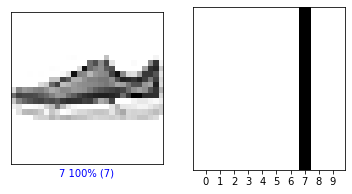

<Figure size 432x288 with 0 Axes>

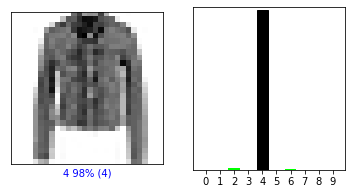

<Figure size 432x288 with 0 Axes>

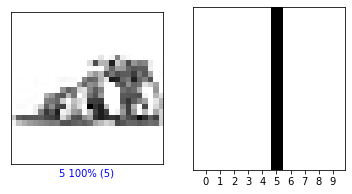

<Figure size 432x288 with 0 Axes>

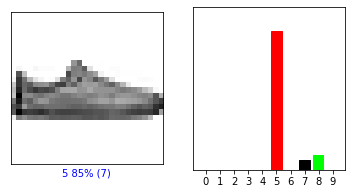

<Figure size 432x288 with 0 Axes>

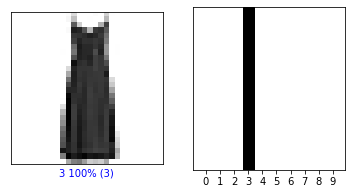

<Figure size 432x288 with 0 Axes>

In [75]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions3[i],  test_labels)
    plt.show()
    plt.clf()

## **DROPOUT**

Dropout es una de las técnicas de regularización más efectivas 

Aplicar dropout a una capa consiste en retirar (poner a cero) 
aleatoriamente un número de características de salida de la 
capa durante el entrenamiento.

La “tasa de dropout” es la proporción de características que se 
ponen a 0 (entre 0.2 a 0.5)

Durante la prueba, no se retira ninguna unidad. En su lugar, 
los valores de salida de la capa se reducen en un factor
igual a la “tasa de dropout” (para equilibrar que haya más 
unidades (neuronas) activas que en el entrenamiento).

In [76]:
from keras import layers
from keras import models
modelD = Sequential()
modelD.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelD.add(layers.Dropout(0.5))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Conv2D(64, (5, 5), activation='relu'))
modelD.add(layers.Dropout(0.5))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Flatten())
modelD.add(layers.Dropout(0.5))
modelD.add(Dense(10, activation='softmax'))
modelD.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 dropout_11 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                

In [77]:
modelD.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

modelD.fit(train_images, train_labels, epochs=5, batch_size=100)

test_lossD, test_accD = modelD.evaluate(test_images, test_labels)

print('Test accuracy:', test_accD)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 1.0899 - accuracy: 0.6042
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.7040 - accuracy: 0.7406
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6269 - accuracy: 0.7675
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5867 - accuracy: 0.7853
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.8034 - accuracy: 0.8288
Test accuracy: 0.8288000226020813


## **BatchNormalization**

Capa que normaliza sus entradas.

La normalización por lotes aplica una transformación que mantiene la salida media cerca de 0 y la desviación estándar de salida cerca de 1.



In [78]:
from keras import layers
from keras import models
from tensorflow.keras.layers import BatchNormalization
modelB = Sequential()
modelB.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D((2, 2)))

modelB.add(Conv2D(64, (5, 5), activation='relu'))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D((2, 2)))

modelB.add(Flatten())
modelB.add(layers.Dropout(0.5))
modelB.add(Dense(10, activation='softmax'))
modelB.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_8 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 batch_normalization_9 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                                 
                                                     

In [79]:
modelB.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

modelB.fit(train_images, train_labels, epochs=5, batch_size=100)

test_lossB, test_accB = modelB.evaluate(test_images, test_labels)

print('Test accuracy:', test_accB)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 0.7083 - accuracy: 0.7666
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.4566 - accuracy: 0.8400
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3933 - accuracy: 0.8616
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3619 - accuracy: 0.8704
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3393 - accuracy: 0.8797
Test accuracy: 0.8797000050544739


# **Callbacks API**
Una "callback" o devolución de llamada es un objeto que puede realizar acciones en varias etapas del entrenamiento (por ejemplo, al comienzo o al final de una época, antes o después de un solo lote, etc.).

Puede usar devoluciones de llamada para:

 

*   Escribir registros de TensorBoard después de cada lote de entrenamiento     para monitorear sus métricas
*   Guarde periódicamente el modelo en el disco
*   Hacer paradas tempranas
*   Obtener una vista de los estados internos y las estadísticas de un modelo durante el entrenamiento
*   etc


*   **Creamos un modelo implementando callback**

In [80]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Flatten

#from keras.datasets import fashion_mnist

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

modelnuevo = Sequential()
modelnuevo.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Flatten())
modelnuevo.add(Dense(65, activation='relu'))
modelnuevo.add(Dense(10, activation='softmax'))
modelnuevo.summary()

#Antes de compilar y entrenar los modelos, preparamos los datos
from keras.utils.np_utils import to_categorical
import tensorflow as tf

#train_images = train_images.reshape((60000, 28, 28, 1))
#train_images = train_images.astype('float32') / 255

#test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255

modelnuevo.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


modelnuevo.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          callbacks=[callback])

test_loss, test_acc = modelnuevo.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 6272)              0         
                                                                 
 dense_23 (Dense)            (None, 65)              